In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [ ]:
data = np.loadtxt('cbm5-COORDINATION_2')
weights = np.loadtxt('cbm5-bias_2',usecols=1)
weights /= np.sum(weights)

cbm5_x = np.arange(1,68)
cbm5_y = data[:,0]*1e-6
cbm5_z = np.delete(data,0,1)
cbm5_rew = np.swapaxes(cbm5_z,0,1)*weights*len(cbm5_z)
cbm5_zz = np.swapaxes(cbm5_rew,0,1)

plt.contourf(cbm5_x,cbm5_y,cbm5_zz,cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('Nr. of contacts')
plt.show()

cbm5_contacts = np.loadtxt('cbm5-coordination_block_2.dat',usecols=(1,2)) #cbm5_zz.sum(axis=0)
plt.errorbar(cbm5_x,cbm5_contacts[:,0],cbm5_contacts[:,1],fmt='.',capsize=2)
plt.title('CjCBM5')
plt.show()

# print('aa with most contacts',np.argsort(cbm5_contacts)[::-1][:12]+1)
# print('contacts',np.sort(cbm5_contacts)[::-1][:12])

In [ ]:
idx = np.argsort(cbm5_contacts[:,0])[::-1]
shift =  296-47
for i,j,k in zip(cbm5_x[idx],cbm5_x[idx]+shift,cbm5_contacts[:,0][idx]):
    if k>0.5:
        print(i,j,k)

In [ ]:
data = np.loadtxt('cbm73-COORDINATION_2')
weights = np.loadtxt('cbm73-bias_2',usecols=1)
weights /= np.sum(weights)

cbm73_x = np.arange(1,69)
cbm73_y = data[:,0]*1e-6
cbm73_z = np.delete(data,0,1)
cbm73_rew = np.swapaxes(cbm73_z,0,1)*weights*len(cbm73_z)
cbm73_zz = np.swapaxes(cbm73_rew,0,1)

plt.contourf(cbm73_x,cbm73_y,cbm73_zz,cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('Nr. of contacts')
plt.show()

cbm73_contacts = np.loadtxt('cbm73-coordination_block_2.dat',usecols=(1,2)) #cbm5_zz.sum(axis=0)
plt.errorbar(cbm73_x,cbm73_contacts[:,0],cbm73_contacts[:,1],fmt='.',capsize=2)
plt.title('CjCBM73')
plt.show()


In [ ]:
idx = np.argsort(cbm73_contacts[:,0])[::-1]
shift = 386-50
for i,j,k in zip(cbm73_x[idx],cbm73_x[idx]+shift,cbm73_contacts[:,0][idx]):
    if k>0.5:
        print(i,j,k)

In [ ]:
#rc('font',**{'family':'serif','serif':['Palatino']})



fig = plt.figure(figsize=[12,8], dpi=300)
axis_label_size=18
markersize=2
cmap = 'plasma'
c1 = 'red'
c2 = 'darkred'
levels = [0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]

cbm73_csp = np.loadtxt('cbm73-data.txt')
cbm5_csp = np.loadtxt('cbm5-data.txt')


cbm73_wham = np.loadtxt('cbm73-wham.dat')
cbm5_wham = np.loadtxt('cbm5-wham.dat')


# A. bottom CBM5 contacts over time
ax1 = plt.subplot(223)
ax1_contour = ax1.contourf(cbm5_x,cbm5_y,cbm5_zz,cmap='plasma',levels=levels)
ax1.set_xlim(1,len(cbm5_x))
ax1.set_xticks([10,20,30,40,50,60])
ax1.set_xticklabels(np.array([10,20,30,40,50,60])+249)
ax1.set_xlabel('Residue', fontsize=axis_label_size)
ax1.set_ylabel('Time (µs)', fontsize=axis_label_size)
#ax1.set_yticks([0,2000,4000,6000,8000,10000])
ax1.set_yticks([0,3,6,9,12,15])
ax1.set_yticklabels([0,3,6,9,12,15])
ax1.set_ylim(0,15)
#ax1.text(-0.1, 1.15, 'C', transform=ax1.transAxes,fontsize=16, fontweight='bold', va='top', ha='right')
ax1.tick_params(labelsize=axis_label_size-2)    


# A. top CBM5 average contacts

ax2 = plt.subplot(221,sharex=ax1)
ax2.set_title('$\it{Cj}$CBM5', fontsize=axis_label_size)
ax2.set_xlim(1,len(cbm5_x))
ax2.bar(cbm5_x,cbm5_contacts[:,0],yerr=cbm5_contacts[:,1],capsize=2,ecolor=c2,width=0.6,color=c1,alpha=0.6,error_kw={'alpha':0.8})
ax2.tick_params(labelbottom=False, labelsize=axis_label_size-2)    
ax2.tick_params(axis='y', labelcolor=c1)
ax2.set_ylabel(r'$\langle c_w \rangle$', color=c1, fontsize=axis_label_size)
ax2.set_ylim(0,1.62)
ax22 = ax2.twinx()
ax22.errorbar(cbm5_csp[:,0], cbm5_csp[:,1], yerr=cbm5_csp[:,2], fmt='ok', ms=markersize, capsize=2, ecolor='grey')
ax22.set_ylabel(r'$\Delta \delta$ (ppm)', fontsize=axis_label_size)
ax22.set_ylim(0,0.2)
ax22.tick_params(labelsize=axis_label_size-2)    
ax2.text(-0.1, 1.15, 'A.', transform=ax2.transAxes,fontsize=axis_label_size+2, fontweight='bold', va='top', ha='right')



# B. bottom CBM73 contacts over time

ax3 = plt.subplot(224)
ax3_contour = ax3.contourf(cbm73_x,cbm73_y,cbm73_zz,cmap='plasma',levels=levels)
ax3.set_xlim(1,len(cbm73_x))
ax3.set_xticklabels(np.array([10,20,30,40,50,60])+336)
ax3.set_xticks([10,20,30,40,50,60])
ax3.set_xlabel('Residue', fontsize=axis_label_size)
ax3.set_ylabel('Time (µs)', fontsize=axis_label_size)
ax3.set_yticks([0,3,6,9,12,15])
ax3.set_yticklabels([0,3,6,9,12,15])
ax3.set_ylim(0,15)
#ax3_cbar = plt.colorbar(ax3_contour,orientation='horizontal', fraction=0.07,pad=0.27)
#ax3_cbar.set_label('Nr. of contacts')
ax3.tick_params(labelsize=axis_label_size-2)    


# B. top CBM73 average contacts

ax4 = plt.subplot(222,sharex=ax3)
ax4.set_xlim(1,len(cbm73_x))
ax4.set_title('$\it{Cj}$CBM73', fontsize=axis_label_size)
ax4.bar(cbm73_x,cbm73_contacts[:,0],yerr=cbm73_contacts[:,1],capsize=2,ecolor=c2,width=0.6,color=c1,alpha=0.6,error_kw={'alpha':0.8})
ax4.tick_params(labelbottom=False, labelsize=axis_label_size-2)    
ax4.tick_params(axis='y', labelcolor=c1)
ax4.set_ylabel(r'$\langle c_w \rangle$', color=c1, fontsize=axis_label_size)
ax4.set_ylim(0,1.62)
ax44 = ax4.twinx()
ax44.errorbar(cbm73_csp[:,0], cbm73_csp[:,1], yerr=cbm73_csp[:,2], fmt='ok', ms=markersize, capsize=2, ecolor='grey')
ax44.set_ylabel(r'$\Delta \delta$ (ppm)', fontsize=axis_label_size)
ax44.set_ylim(0,0.2)
ax44.tick_params(labelsize=axis_label_size-2)    
ax4.text(-0.1, 1.15, 'B.', transform=ax4.transAxes,fontsize=axis_label_size+2, fontweight='bold', va='top', ha='right')


cbar_ax = fig.add_axes([0.25, -0.03, 0.5, 0.03])
fig.colorbar(ax1_contour, cax=cbar_ax,orientation='horizontal')
cbar_ax.set_xlabel(r'Nr. of contacts ($c_i$)',fontsize=axis_label_size-2)
cbar_ax.tick_params(labelsize=axis_label_size-2)    


#plt.gcf().text(0.075,0.95,'A',fontsize=18 )
#plt.gcf().text(0.365,0.95,'B',fontsize=18 )
#plt.gcf().text(0.71,0.95,'C',fontsize=18 )

plt.tight_layout()
plt.subplots_adjust(wspace=0.55)
plt.savefig('simulations.png',dpi=300,bbox_inches = "tight")
plt.show()

In [ ]:
name = "Dark2"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors

plt.figure(figsize=[4,4])
plt.xlim(0,4.45)
plt.ylim(-0.5,30)
#ax5.yaxis.tick_right()
#ax5.yaxis.set_label_position("right")
plt.errorbar(cbm5_wham[:,0], cbm5_wham[:,1],yerr=cbm5_wham[:,2],fmt='.', capsize=2, markersize=0.4, color=colors[0], label='$\it{Cj}$CBM5')
#ax5.fill_between(cbm5_wham[:,0], cbm5_wham[:,1]-cbm5_wham[:,2], cbm5_wham[:,1]+cbm5_wham[:,2], color='mediumslateblue', alpha=0.6)
plt.errorbar(cbm73_wham[:,0], cbm73_wham[:,1],yerr=cbm73_wham[:,2],fmt='.',capsize=2, markersize=0.4, color=colors[1], label='$\it{Cj}$CBM73')
#ax5.fill_between(cbm73_wham[:,0], cbm73_wham[:,1]-cbm73_wham[:,2], cbm73_wham[:,1]+cbm73_wham[:,2], color='darkturquoise', alpha=0.6)
plt.xlabel('$r_{chitin}$ (nm)', fontsize=18)
plt.ylabel('Free energy (kJ/mol)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('FES.png',dpi=300)
plt.show()

In [6]:
CV5 = np.loadtxt('cbm5-COLVAR')
HILLS5 = np.loadtxt('cbm5-HILLS',usecols=(0,5))

CV73 = np.loadtxt('cbm73-COLVAR')
HILLS73 = np.loadtxt('cbm73-HILLS',usecols=(0,5))

ct_cbm5 = np.loadtxt('cbm5-ct.dat')
ct_cbm73 = np.loadtxt('cbm73-ct.dat')
x5 = np.arange(0,len(ct_cbm5))*10e-3
x73 = np.arange(0,len(ct_cbm73))*10e-3

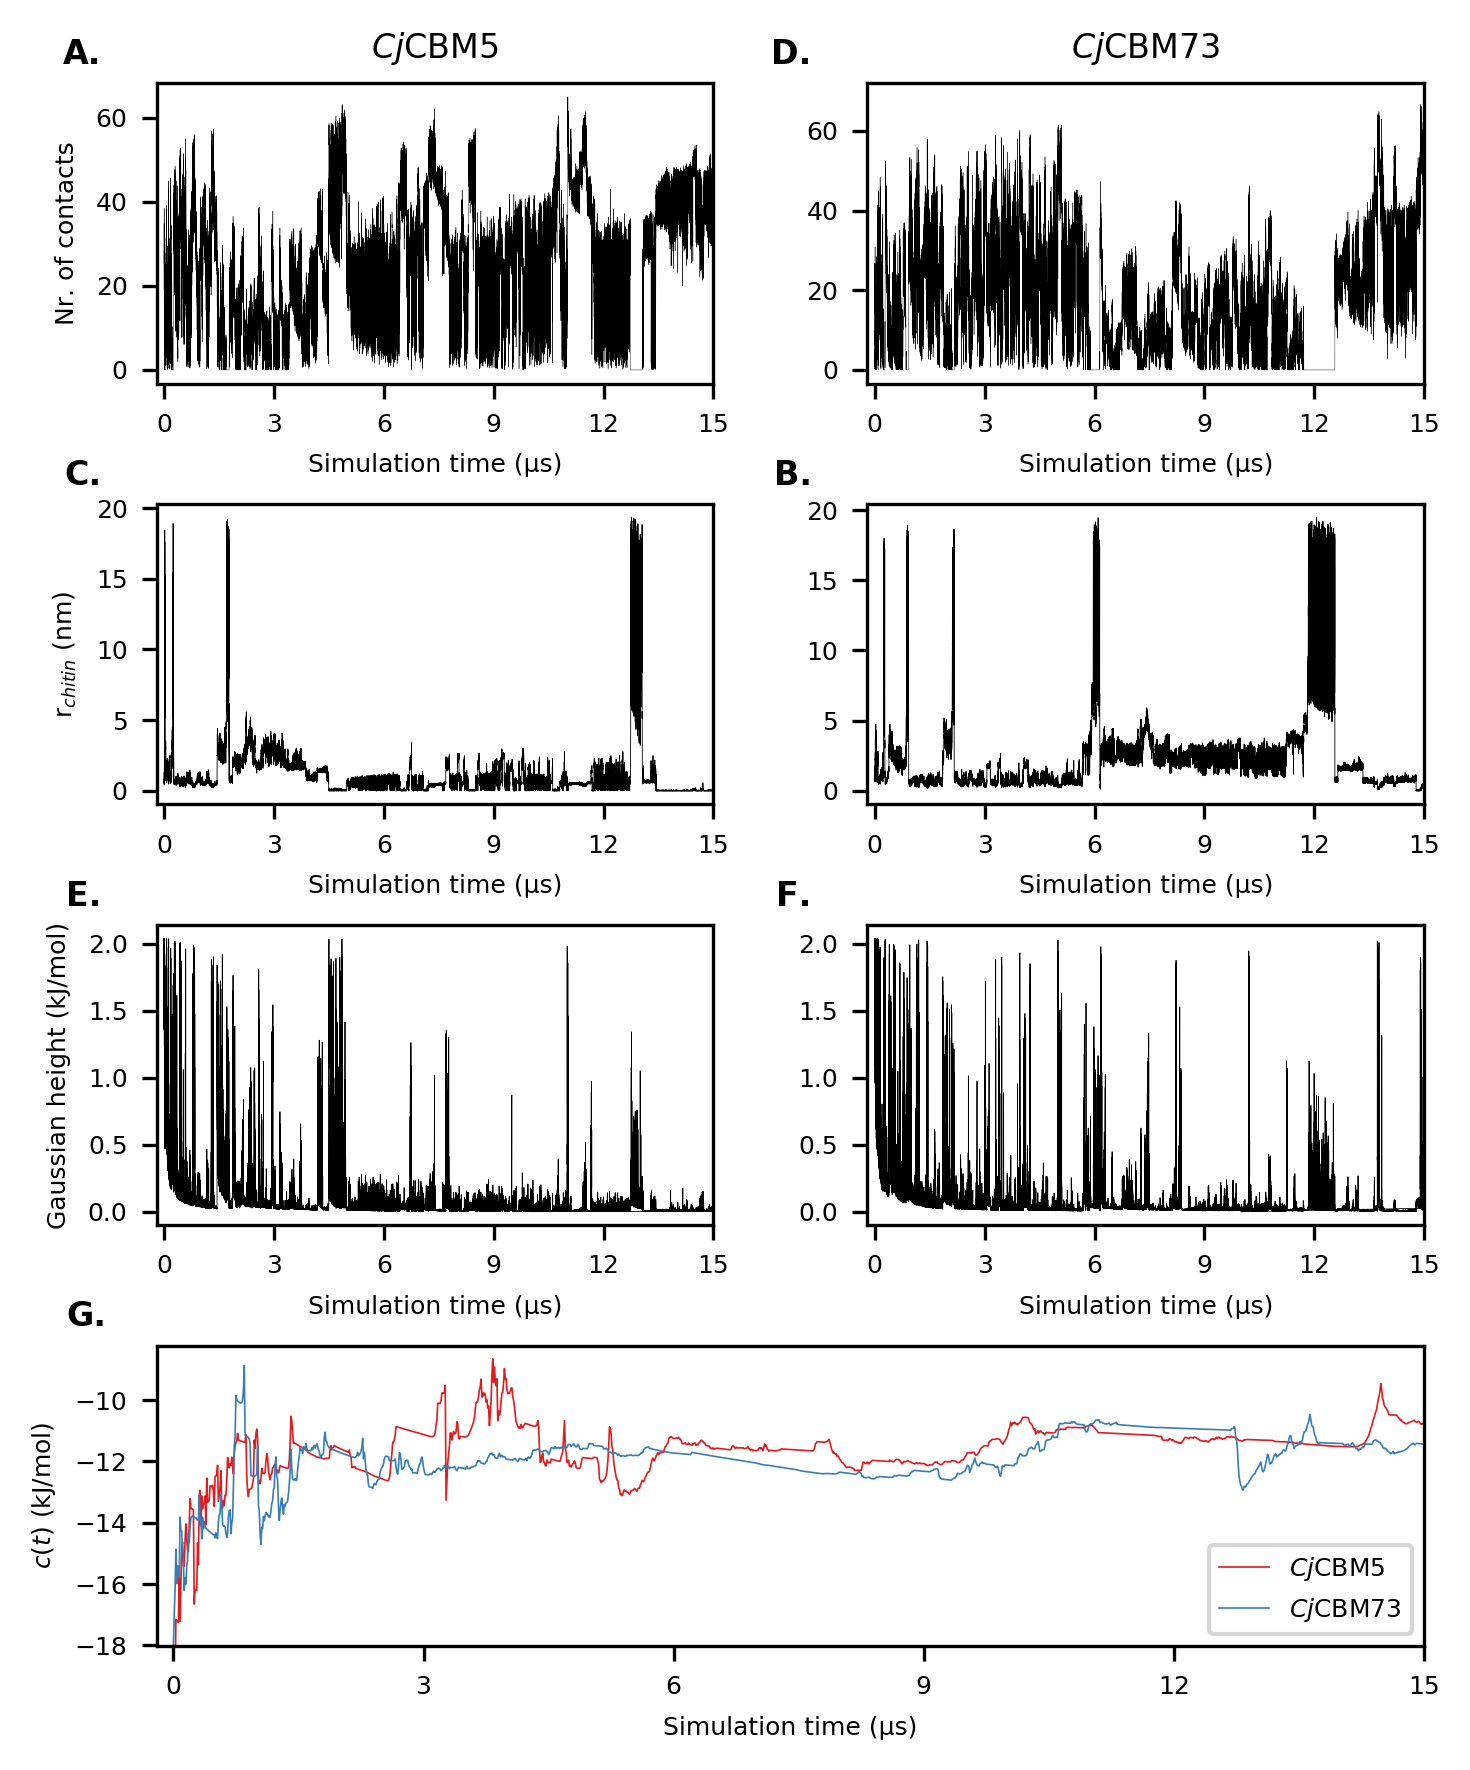

In [72]:
xmin=-0.2
xmax=15.0
fig = plt.figure(figsize=[5,6], dpi=300)

name = "Set1"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors


ax1 = plt.subplot(4,2,1)
ax1.set_title('$\it{Cj}$CBM5',fontsize=8)
ax1.plot(CV5[:,0]*1e-6,CV5[:,1], color='k',linewidth=0.1)
ax1.set_xlim(xmin,xmax)
ax1.tick_params(labelsize=6)
ax1.set_ylabel('Nr. of contacts',fontsize=6)
ax1.set_xlabel('Simulation time (µs)',fontsize=6)
ax1.text(-0.1, 1.15, 'A.', transform=ax1.transAxes,fontsize=8, fontweight='bold', va='top', ha='right')
ax1.set_xticks([0,3,6,9,12,15])
ax1.set_xticklabels([0,3,6,9,12,15])

ax2 = plt.subplot(4,2,3,sharex=ax1)
ax2.plot(CV5[:,0]*1e-6,CV5[:,2], color='k',linewidth=0.2)
ax2.set_xlim(xmin,xmax)
ax2.tick_params(labelsize=6)    
ax2.set_ylabel('r$_{chitin}$ (nm)',fontsize=6)
ax2.set_xlabel('Simulation time (µs)',fontsize=6)
ax2.text(-0.1, 1.15, 'C.', transform=ax2.transAxes,fontsize=8, fontweight='bold', va='top', ha='right')
ax2.set_xticks([0,3,6,9,12,15])
ax2.set_xticklabels([0,3,6,9,12,15])

ax3 = plt.subplot(4,2,5,sharex=ax1)
ax3.plot(HILLS5[:,0]*1e-6,HILLS5[:,1], color='k',linewidth=0.2)
ax3.set_xlim(xmin,xmax)
ax3.tick_params(labelsize=6)
ax3.set_xlabel('Simulation time (µs)',fontsize=6)
ax3.set_ylabel('Gaussian height (kJ/mol)',fontsize=6)
ax3.text(-0.1, 1.15, 'E.', transform=ax3.transAxes,fontsize=8, fontweight='bold', va='top', ha='right')
ax3.set_xticks([0,3,6,9,12,15])
ax3.set_xticklabels([0,3,6,9,12,15])


#fig = plt.figure(figsize=[6,4], dpi=300)
ax4 = plt.subplot(4,2,2)
ax4.set_title('$\it{Cj}$CBM73',fontsize=8)
ax4.plot(CV73[:,0]*1e-6,CV73[:,1], color='k',linewidth=0.1)
ax4.set_xlim(xmin,xmax)
ax4.tick_params(labelsize=6)
#ax4.set_ylabel('Nr. of contacts',fontsize=6)
ax4.set_xlabel('Simulation time (µs)',fontsize=6)
ax4.text(-0.1, 1.15, 'D.', transform=ax4.transAxes,fontsize=8, fontweight='bold', va='top', ha='right')
ax4.set_xticks([0,3,6,9,12,15])
ax4.set_xticklabels([0,3,6,9,12,15])


ax5 = plt.subplot(4,2,4,sharex=ax4)
ax5.plot(CV73[:,0]*1e-6,CV73[:,2], color='k',linewidth=0.2)
ax5.set_xlim(xmin,xmax)
ax5.tick_params(labelsize=6)
ax5.set_xlabel('Simulation time (µs)',fontsize=6)
ax5.text(-0.1, 1.15, 'B.', transform=ax5.transAxes,fontsize=8, fontweight='bold', va='top', ha='right')
ax5.set_xticks([0,3,6,9,12,15])
ax5.set_xticklabels([0,3,6,9,12,15])
#ax5.set_ylabel(r'r$_{chitin} (nm)$',fontsize=6)

ax6 = plt.subplot(4,2,6,sharex=ax4)
ax6.plot(HILLS73[:,0]*1e-6,HILLS73[:,1], color='k',linewidth=0.2)
ax6.set_xlim(xmin,xmax)
ax6.tick_params(labelsize=6)
ax6.set_xlabel('Simulation time (µs)',fontsize=6)
ax6.text(-0.1, 1.15, 'F.', transform=ax6.transAxes,fontsize=8, fontweight='bold', va='top', ha='right')
ax6.set_xticks([0,3,6,9,12,15])
ax6.set_xticklabels([0,3,6,9,12,15])
#ax6.set_ylabel('Gaussian height (kJ/mol)',fontsize=6)


ax0 = plt.subplot(4,1,4)
ax0.plot(x5,ct_cbm5, color=colors[0],label='$\it{Cj}$CBM5',linewidth=0.4)
ax0.plot(x73,ct_cbm73, color=colors[1],label='$\it{Cj}$CBM73',linewidth=0.4)
ax0.set_xlabel('Simulation time (µs)',fontsize=6)
ax0.set_ylabel('$c(t)$ (kJ/mol)',fontsize=6)
ax0.set_xticks([0,3,6,9,12,15])
ax0.set_xticklabels([0,3,6,9,12,15])
ax0.tick_params(labelsize=6)
ax0.set_xlim(-0.2,15)
ax0.set_ylim(ct_cbm73.min(),ct_cbm5.max()*0.95)
ax0.text(-0.04, 1.15, 'G.', transform=ax0.transAxes,fontsize=8, fontweight='bold', va='top', ha='right')

plt.legend(fontsize=6)
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

plt.savefig('CVs_HILLS.png', dpi=300)
plt.show()
